## MLSC - Classification Excercise

### About the data set (Bank Client Data)

#### Bank client data:
**age:** Age of the client<br>
**duration:** last contact duration, in seconds.<br> 

#### Other attributes:
**campaign:** number of contacts performed during this campaign and for this client<br>
**pdays:** number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)<br>
**previous:** number of contacts performed before this campaign and for this client<br>

#### Social and economic context 

**emp.var.rate:** employment variation rate - quarterly indicator<br>
**cons.price.idx:** consumer price index - monthly indicator<br>
**cons.conf.idx:** consumer confidence index - monthly indicator<br>
**euribor3m:** euribor 3 month rate - daily indicator<br>
**nr.employed:** number of employees - quarterly indicator<br>

**y** - (Output variable) has the client subscribed a term deposit?

# Table of Content

1. Data Preprocessing - **3 Marks**
2. Logistic Regression Model - **3 Marks**
3. Decision Tree Model - **3 Marks**
4. Random Forest Model - **3 Marks**
5. XGBoost Model - **3 Marks**
6. K Nearest Neighbors Model - **3 Marks**
7. Naive Bayes Model - **3 Marks**
8. Compare the Results of all the above mentioned algorithms - **4 Marks**
9. Intrepret your solution based on the results - **5 Marks**


<a id="logreg"> </a>
## 1. Data Pre-Processing

**Import the required libraries**

In [96]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
filterwarnings('ignore')



# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score



from sklearn import linear_model, datasets, tree
import pydotplus
from IPython.display import Image


import pylab as pl

#### Load the csv file

In [2]:
df_bank = pd.read_csv("bank.csv")
df_bank.head(2)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32,205,2,999,0,1.1,93.994,-36.4,4.858,5191.0,no
1,32,691,10,999,0,1.4,93.918,-42.7,4.960,5228.1,yes


In [3]:
df_bank.shape

(9640, 11)

In [4]:
df_bank.keys()

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9640 entries, 0 to 9639
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9640 non-null   int64  
 1   duration        9640 non-null   int64  
 2   campaign        9640 non-null   int64  
 3   pdays           9640 non-null   int64  
 4   previous        9640 non-null   int64  
 5   emp.var.rate    9640 non-null   float64
 6   cons.price.idx  9640 non-null   float64
 7   cons.conf.idx   9640 non-null   float64
 8   euribor3m       9640 non-null   float64
 9   nr.employed     9640 non-null   float64
 10  y               9640 non-null   object 
dtypes: float64(5), int64(5), object(1)
memory usage: 828.6+ KB


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Prepare the data </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
df_bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,9640.000000,9640.000000,9640.000000,9640.000000,9640.000000,9640.000000,9640.000000,9640.000000,9640.000000,9640.000000
mean,40.286618,379.564004,2.349170,893.100519,0.306120,-0.460218,93.485750,-40.265373,3.003616,5137.407147
std,11.901274,354.768370,2.384519,306.531615,0.684605,1.717852,0.631366,5.322795,1.886179,86.347481
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,141.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-42.700000,1.250000,5076.200000
50%,38.000000,260.000000,2.000000,999.000000,0.000000,-0.100000,93.444000,-41.800000,4.076000,5191.000000
75%,48.000000,512.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.959000,5228.100000
max,98.000000,4199.000000,42.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
df_bank.dtypes

age                 int64
duration            int64
campaign            int64
pdays               int64
previous            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

##### We can see in the above output that each variable are given with the correct datatypes. so datatype parsing is not needed here

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Perform an analysis for missing values </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first


missing_total = df_bank.isnull().sum()
print(missing_total)

age               0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


###### As we see there is no missing values in or dataset

In [9]:
# Here, There is no need calculating the missing percentage since there is no missing values persent in dataset 

# If needed we can use the below command to calculate the missing percentage 

missing_percent = (df_bank.isnull().sum()*100/df_bank.isnull().count())
print(missing_percent)

age               0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64


In [10]:
# To show in the single table we can concat both and save in new varibale as below 

bank_missing_data = pd.concat([missing_total, missing_percent], axis=1, keys = ['Total', 'Percentage'])
print(bank_missing_data)

                Total  Percentage
age                 0         0.0
duration            0         0.0
campaign            0         0.0
pdays               0         0.0
previous            0         0.0
emp.var.rate        0         0.0
cons.price.idx      0         0.0
cons.conf.idx       0         0.0
euribor3m           0         0.0
nr.employed         0         0.0
y                   0         0.0


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Remove the outliers (if any) </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
df_bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,9640.000000,9640.000000,9640.000000,9640.000000,9640.000000,9640.000000,9640.000000,9640.000000,9640.000000,9640.000000
mean,40.286618,379.564004,2.349170,893.100519,0.306120,-0.460218,93.485750,-40.265373,3.003616,5137.407147
std,11.901274,354.768370,2.384519,306.531615,0.684605,1.717852,0.631366,5.322795,1.886179,86.347481
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,141.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-42.700000,1.250000,5076.200000
50%,38.000000,260.000000,2.000000,999.000000,0.000000,-0.100000,93.444000,-41.800000,4.076000,5191.000000
75%,48.000000,512.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.959000,5228.100000
max,98.000000,4199.000000,42.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


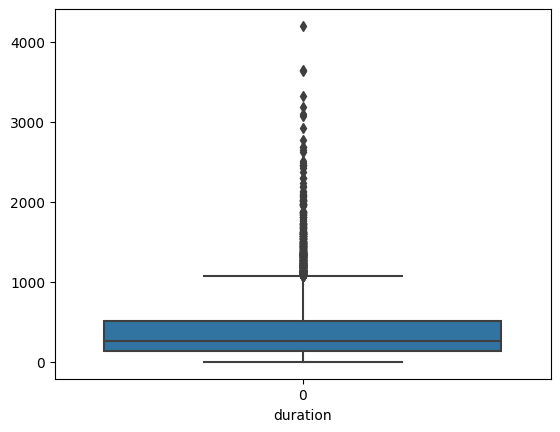

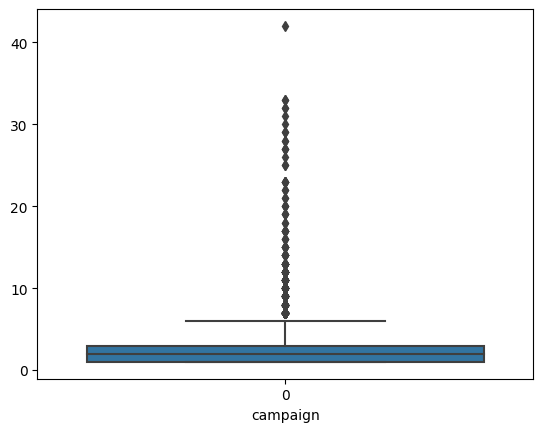

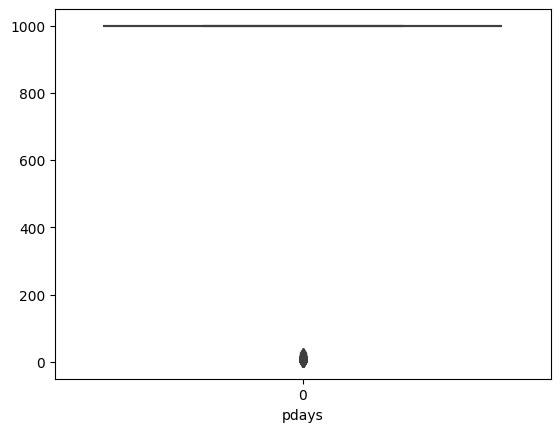

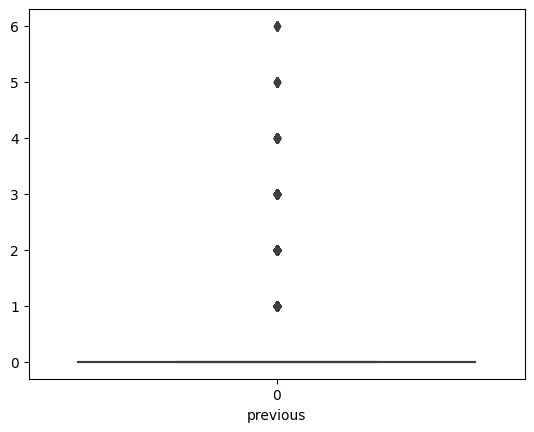

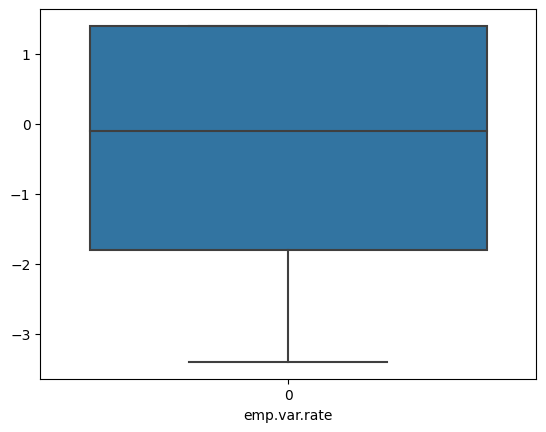

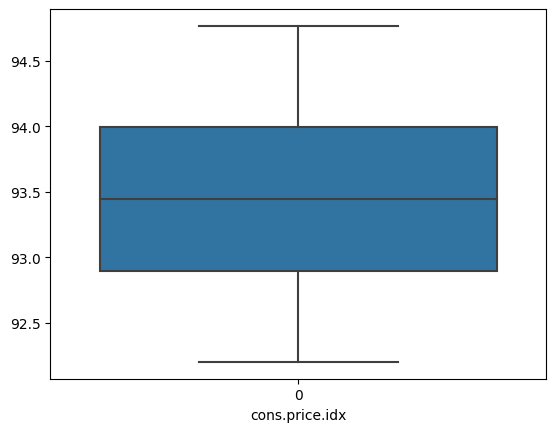

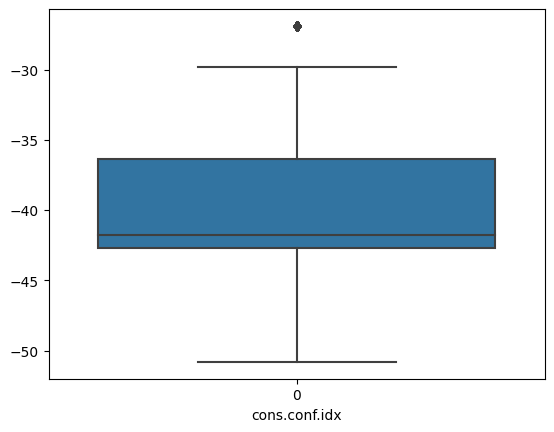

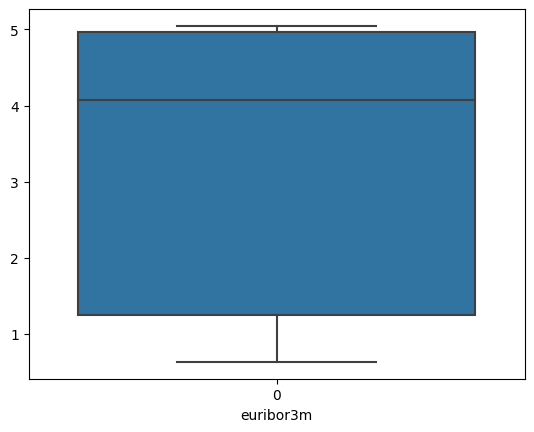

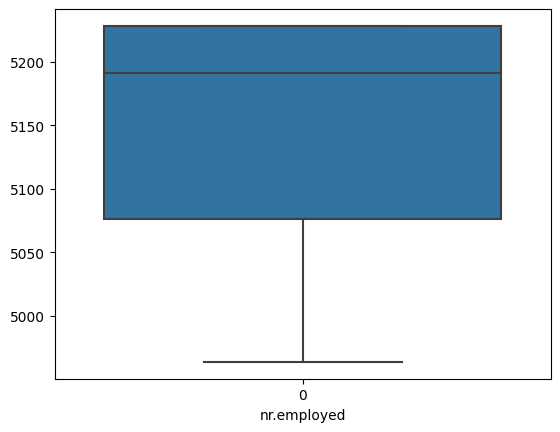

In [12]:
for column in df_bank.columns:
    if column == "age" or column == "y":
        continue
    else:
        sns.boxplot(data=df_bank[column])
        plt.xlabel(column)
        plt.show()

##### From the above plot we can come to know that "duration", "campaign" have more outliers when compared to other dependent variables


In [13]:
#Detecing outlier with IQR

for columns in df_bank.columns:
    if columns == "y" or columns == "age" :
        continue
        print("Yes")
        
    else:
        outliers = []
        q1 = np.percentile(df_bank[columns], 25)
        q3 = np.percentile(df_bank[columns], 75)
        IQR = q3 - q1
        lwr_bound = q1-(1.5*IQR)
        upr_bound = q3 + (1.5*IQR)

        for i in df_bank[columns]:
            if (i<lwr_bound or i> upr_bound):
                outliers.append(i)
        print("There are ", len(outliers), "outliers in the variable", columns )

There are  503 outliers in the variable duration
There are  426 outliers in the variable campaign
There are  1028 outliers in the variable pdays
There are  2088 outliers in the variable previous
There are  0 outliers in the variable emp.var.rate
There are  0 outliers in the variable cons.price.idx
There are  215 outliers in the variable cons.conf.idx
There are  0 outliers in the variable euribor3m
There are  0 outliers in the variable nr.employed


In [14]:
#Replacing outlier with lower bound and upper bound values

for columns in df_bank.columns:
    if columns == "y" or columns == "age" :
        continue
        
    else:
        outliers = []
        median_df = df_bank[columns].median()
        q1 = np.percentile(df_bank[columns], 25)
        q3 = np.percentile(df_bank[columns], 75)
        IQR = q3 - q1
        lwr_bound = q1-(1.5*IQR)
        upr_bound = q3 + (1.5*IQR)
        
        for row_n, i in enumerate(df_bank[columns]):
            if (i<lwr_bound):
                df_bank.at[row_n, columns] = lwr_bound
            
            elif (i> upr_bound):
                df_bank.at[row_n, columns] = upr_bound

In [15]:
#Again detecing outlier with IQR

for columns in df_bank.columns:
    if columns == "y" or columns == "age" :
        continue
        print("Yes")
        
    else:
        outliers = []
        q1 = np.percentile(df_bank[columns], 25)
        q3 = np.percentile(df_bank[columns], 75)
        IQR = q3 - q1
        lwr_bound = q1-(1.5*IQR)
        upr_bound = q3 + (1.5*IQR)

        for i in df_bank[columns]:
            if (i<lwr_bound or i> upr_bound):
                outliers.append(i)
        print("There are ", len(outliers), "outliers in the variable", columns )

There are  0 outliers in the variable duration
There are  0 outliers in the variable campaign
There are  0 outliers in the variable pdays
There are  0 outliers in the variable previous
There are  0 outliers in the variable emp.var.rate
There are  0 outliers in the variable cons.price.idx
There are  0 outliers in the variable cons.conf.idx
There are  0 outliers in the variable euribor3m
There are  0 outliers in the variable nr.employed


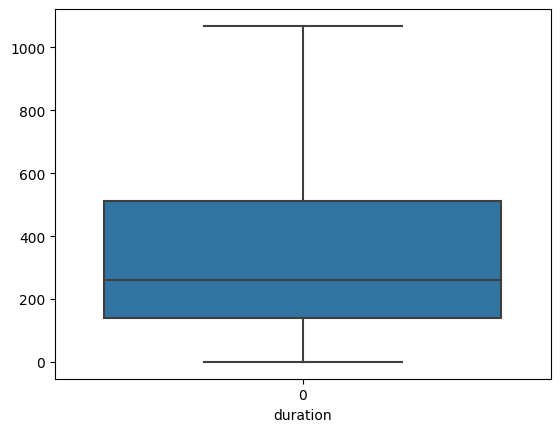

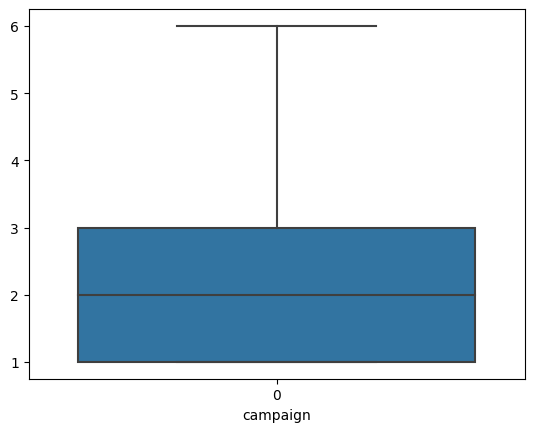

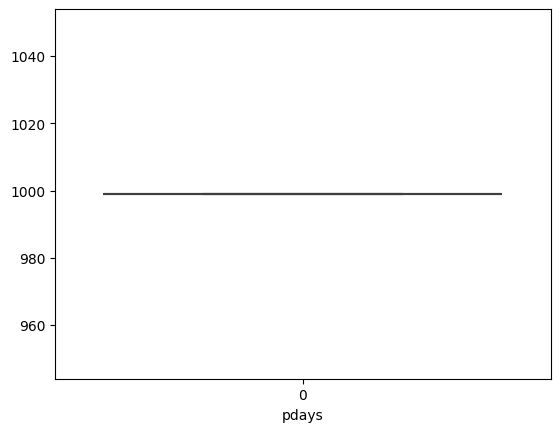

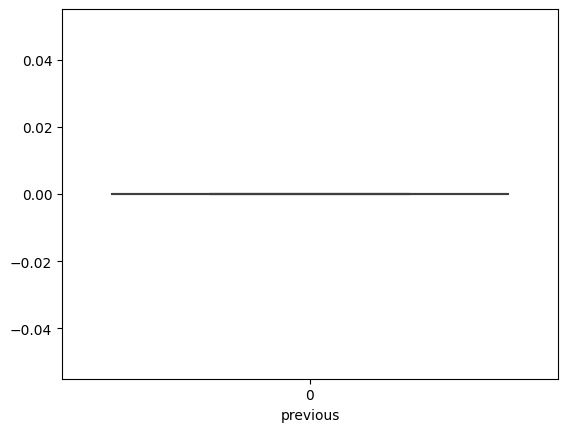

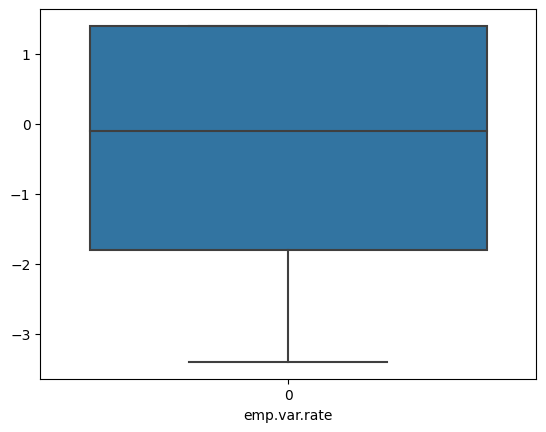

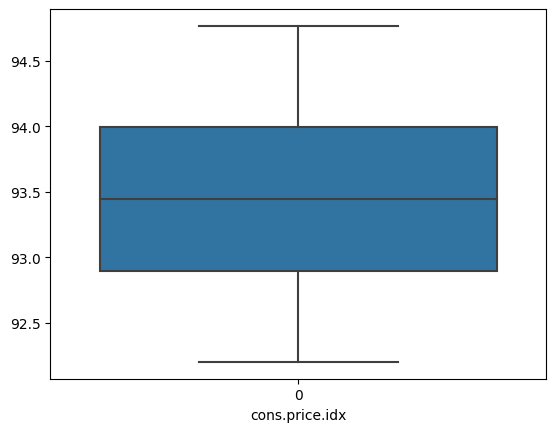

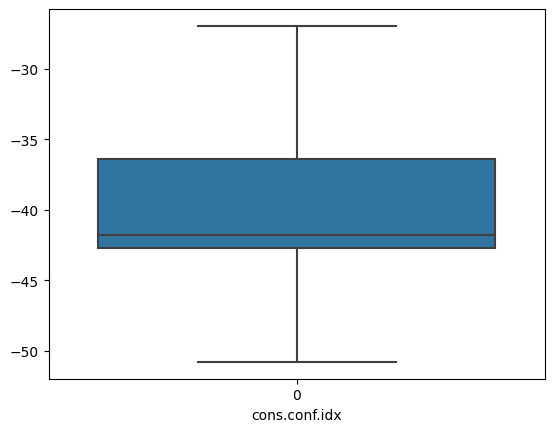

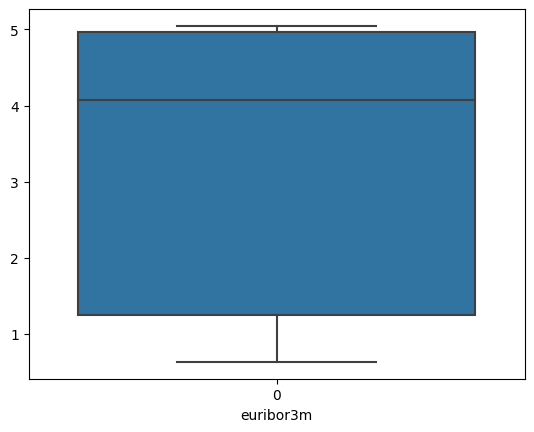

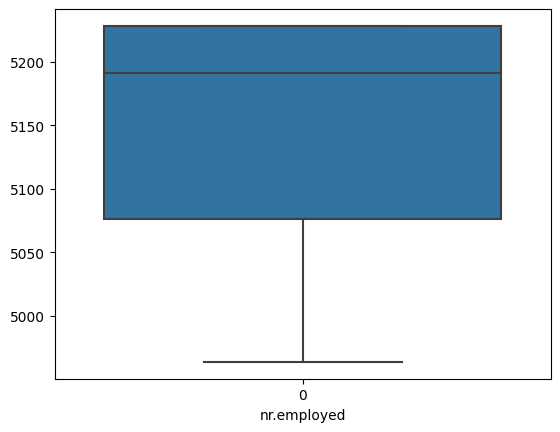

In [16]:
# plotting the box chart to check the outliers again 

for column in df_bank.columns:
    if column == "age" or column == "y":
        continue
    else:
        sns.boxplot(data=df_bank[column])
        plt.xlabel(column)
        plt.show()

# df_bank[['duration','campaign','pdays','previous', 'emp.var.rate','cons.price.idx', 'cons.conf.idx',  'euribor3m', 'nr.employed' ]].boxplot()

##### Here we ave replaced the outliers with lower and upper value, Here there is no outlier in the above box plot.

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Separate the dependent and the independent variables. Also, in the target variable, replace yes with 0 and no with 1 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Separating the independent and dependent can be done before the train-test split, so we can encode the target variable for now

In [17]:
df_bank.y.head(2)

0     no
1    yes
Name: y, dtype: object

In [18]:
df_bank['y']= df_bank.y.replace("yes", 0)
df_bank['y']= df_bank.y.replace("no", 1)

In [19]:
df_bank.head(2)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32,205.0,2,999,0,1.1,93.994,-36.4,4.858,5191.0,1
1,32,691.0,6,999,0,1.4,93.918,-42.7,4.960,5228.1,0


#### We have replaced the yes and no as 'o' and '1' and separated the independent and dependent variable 

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Remove the unnecessary variables that will not contribute to the model. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

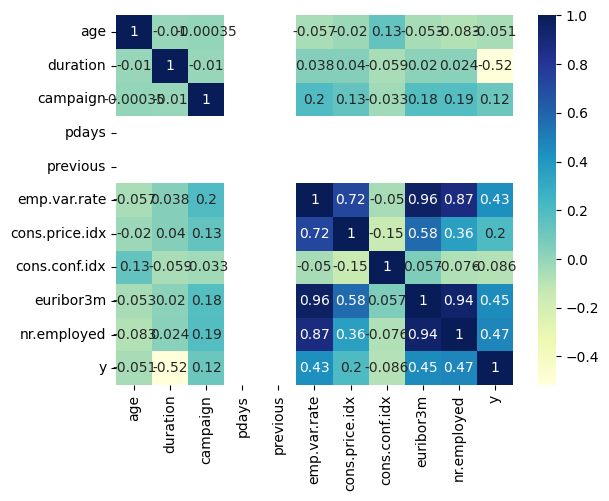

In [20]:
# Heat map visualization

sns.heatmap(df_bank.corr(), cmap="YlGnBu", annot=True)
plt.show()

#### As per the above heat map pdays, previous have no correlation with the target variable which means there is no necessity between this two variable and the target variable

In [21]:
# Removing pdays and previous 

df_bank = df_bank.drop(['pdays', 'previous'], axis=1)


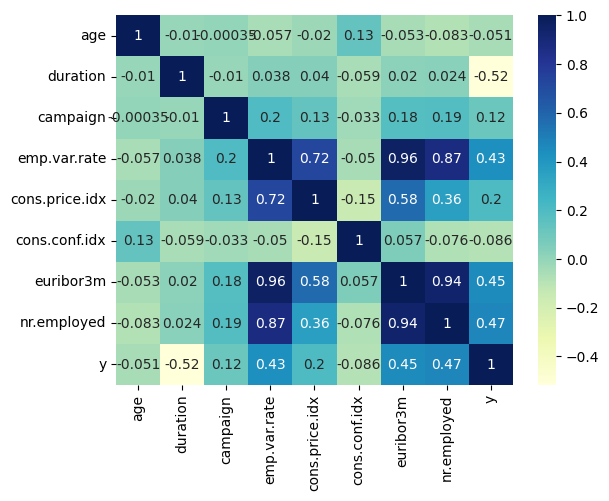

In [22]:
# Heat map visualization

sns.heatmap(df_bank.corr(), cmap="YlGnBu", annot=True)
plt.show()

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Plot the distribution of all the numeric variables and find the value of skewness for each variable. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

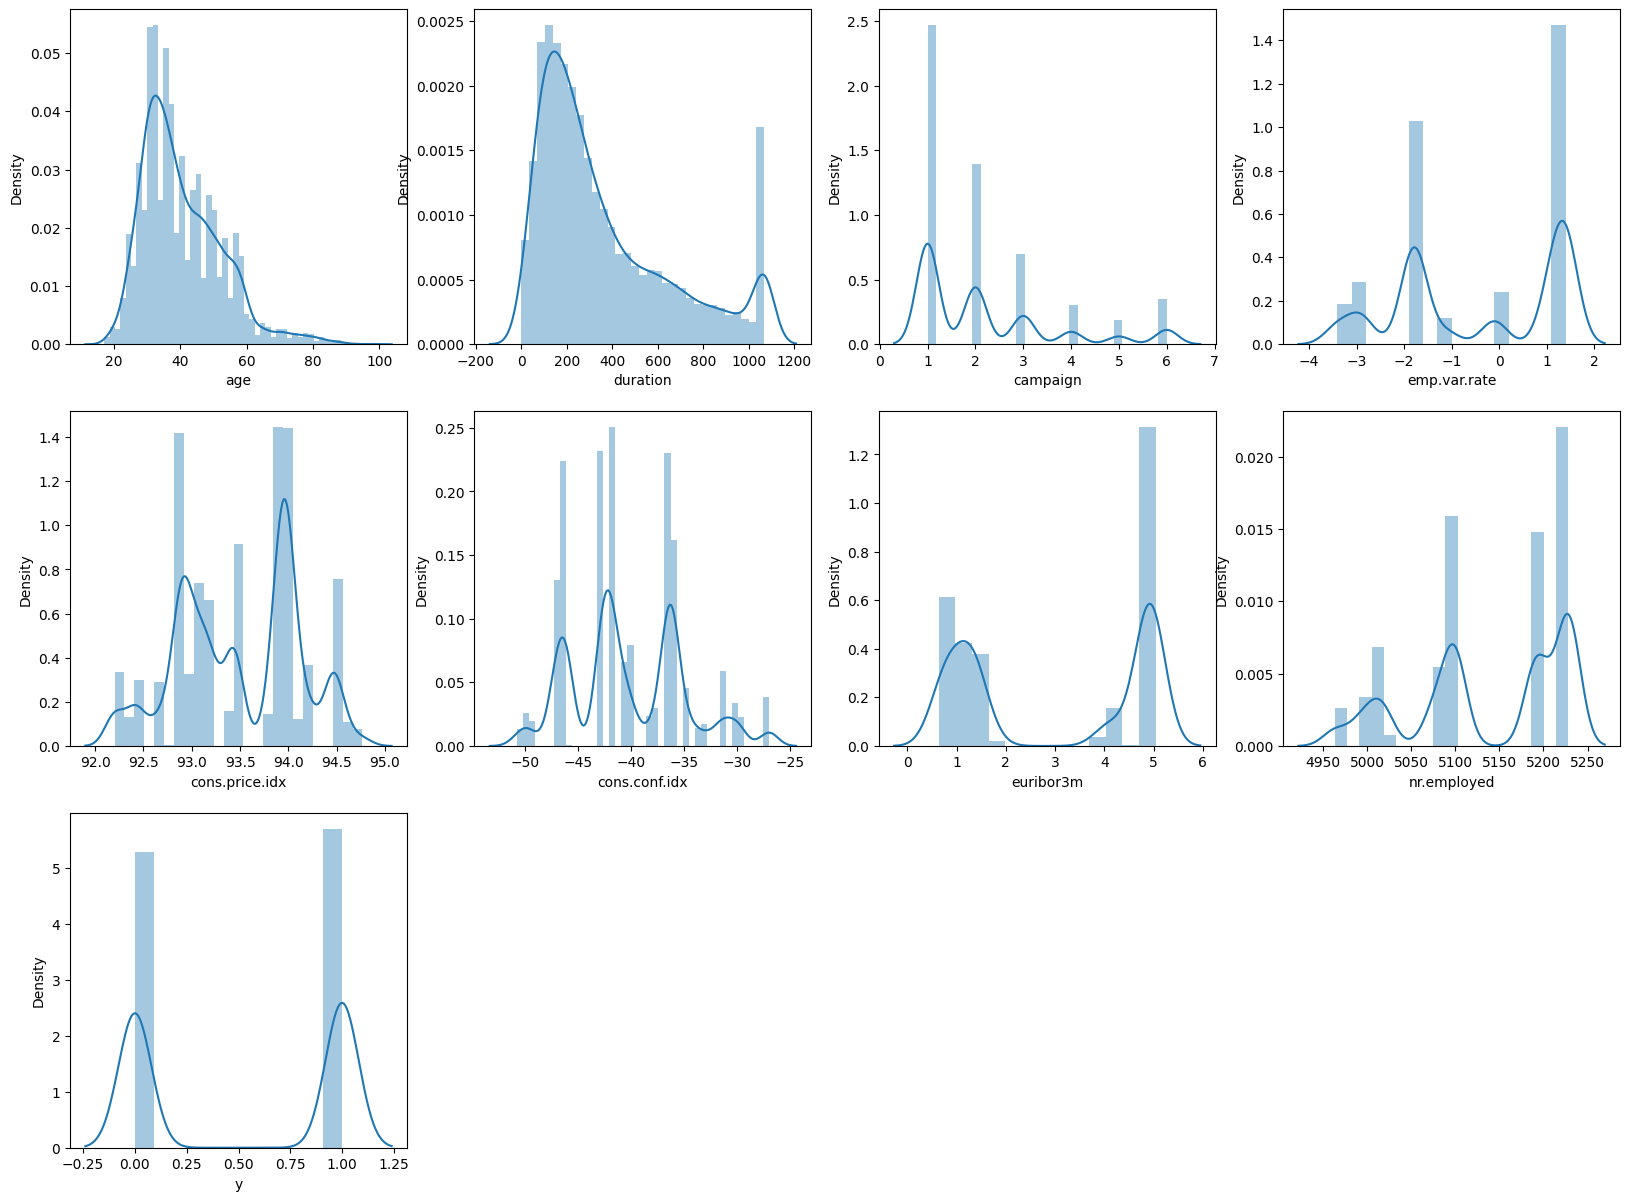

In [23]:

plt.figure(figsize=(20,20))
i=1
for column in df_bank.columns:
    plt.subplot(4,4,i)
    sns.distplot(df_bank[column])
    i = i+1

In [24]:
df_bank.skew()

age               0.990535
duration          1.089882
campaign          1.356104
emp.var.rate     -0.181234
cons.price.idx   -0.125216
cons.conf.idx     0.347668
euribor3m        -0.058332
nr.employed      -0.463581
y                -0.074753
dtype: float64

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Plot the distribution of the target variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot: xlabel='y', ylabel='Density'>

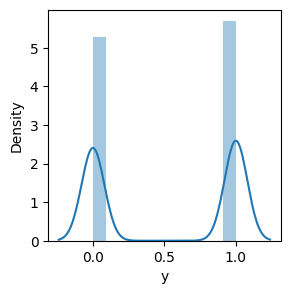

In [25]:
plt.figure(figsize=(3,3))
sns.distplot(df_bank['y'])

### Data Separation

In [26]:
independent_feature =['age','duration','campaign', 'emp.var.rate','cons.price.idx', 'cons.conf.idx',  'euribor3m', 'nr.employed']                       
dependent_feature = ["y"]
df_feature = df_bank[independent_feature]
df_target = df_bank[dependent_feature]
X = df_feature
Y = df_target

In [27]:
X.head(7)

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,32,205.0,2,1.1,93.994,-36.4,4.858,5191.0
1,32,691.0,6,1.4,93.918,-42.7,4.960,5228.1
2,45,45.0,6,1.4,93.444,-36.1,4.963,5228.1
3,33,400.0,1,-1.1,94.601,-49.5,1.032,4963.6
4,47,903.0,2,-1.8,93.075,-47.1,1.415,5099.1
5,25,243.0,3,-1.8,92.843,-50.0,1.531,5099.1
6,36,214.0,1,-0.1,93.200,-42.0,4.120,5195.8


In [28]:
Y.head(7)

,y
0,1
1,0
2,1
3,0
4,0
5,0
6,1


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Scale all the numeric variables using standard scalar.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
std_scalar = StandardScaler()
scaled_var = std_scalar.fit_transform(X)
df_bank_scaled = pd.DataFrame(scaled_var, columns = independent_feature)

In [30]:
df_bank_scaled.head(6)

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,-0.696316,-0.535724,-0.103273,0.908285,0.805042,0.726821,0.983194,0.620697
1,-0.696316,1.132922,2.626141,1.082931,0.684662,-0.457451,1.037275,1.050379
2,0.396061,-1.085073,2.626141,1.082931,-0.066130,0.783215,1.038865,1.050379
3,-0.612287,0.133794,-0.785627,-0.372451,1.766500,-1.735713,-1.045350,-2.012985
4,0.564119,1.860809,-0.103273,-0.779958,-0.650607,-1.284561,-0.842284,-0.443662
5,-1.284519,-0.405254,0.579080,-0.779958,-1.018084,-1.829703,-0.780781,-0.443662


### Train-Test split 

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state= 4, test_size=0.3)


#Checking the dimension f train & test subset using 'shape'

print('X_train', X_train.shape)
print('Y_train', Y_train.shape)

print('X_test', X_test.shape)
print('Y_test', Y_test.shape)


X_train (6748, 8)
Y_train (6748, 1)
X_test (2892, 8)
Y_test (2892, 1)


In [32]:
X

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,32,205.0,2,1.1,93.994,-36.4,4.858,5191.0
1,32,691.0,6,1.4,93.918,-42.7,4.960,5228.1
2,45,45.0,6,1.4,93.444,-36.1,4.963,5228.1
3,33,400.0,1,-1.1,94.601,-49.5,1.032,4963.6
4,47,903.0,2,-1.8,93.075,-47.1,1.415,5099.1
...,...,...,...,...,...,...,...,...
9635,37,854.0,3,1.4,94.465,-41.8,4.961,5228.1
9636,40,353.0,2,1.4,93.918,-42.7,4.960,5228.1
9637,42,86.0,1,-0.1,93.200,-42.0,4.191,5195.8
9638,39,233.0,1,1.4,94.465,-41.8,4.864,5228.1


<a id="logreg"> </a>
## 2. Logistic regression model

In [33]:
import statsmodels
import statsmodels.api as sm

# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model

logreg = sm.Logit(Y_train, X_train).fit()


Optimization terminated successfully.
         Current function value: 0.348894
         Iterations 7


In [34]:
print(logreg.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 6748
Model:                          Logit   Df Residuals:                     6740
Method:                           MLE   Df Model:                            7
Date:                Fri, 30 Dec 2022   Pseudo R-squ.:                  0.4958
Time:                        19:35:27   Log-Likelihood:                -2354.3
converged:                       True   LL-Null:                       -4669.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
age               -0.0038      0.003     -1.246      0.213      -0.010       0.002
duration          -0.0073      0.000    -37.375      0.000      -0.008      -0.007
campaign           0.0768      0.028

In [35]:
# 'aic' retuns the AIC value for the model
print('AIC:', logreg.aic)

AIC: 4724.676138086178


#### We can use the AIC value to compare different models created on the same dataset.

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>How does a unit change in each feature influence the odds of a client subscribed a term deposit or not?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [36]:
# take the exponential of the coefficient of a variable to calculate the odds
# 'params' returns the coefficients of all the independent variables
# pass the required column name to the parameter, 'columns'
df_odds = pd.DataFrame(np.exp(logreg.params), columns= ['Odds']) 

# print the dataframe
df_odds

,Odds
age,0.996204
duration,0.992691
campaign,1.079844
emp.var.rate,2.691018
cons.price.idx,0.534261
cons.conf.idx,0.961953
euribor3m,0.690245
nr.employed,1.012010


##### odds_age = 0.99, It implies  that the odds of client subcriber a terrm deposit increases by a factor of 0.9 due to 0.9 unit increases in the age, keeping other variabels constant 

##### odds_duration = 0.99, It implies  that the odds of client subcriber a terrm deposit increases by a factor of 0.9 due to 0.9 unit increases in the duration, keeping other variabels constant 

##### odds_campaign = 1.07, It implies  that the odds of client subcriber a terrm deposit increases by a factor of 1.07 due to 1.07 unit increases in the campaign, keeping other variabels constant 

##### odds_emp_var_rate = 2.69, It implies  that the odds of client subcriber a terrm deposit increases by a factor of 2.69 due to 2.69 unit increases in the emp.var.rate, keeping other variabels constant 

##### odds_cons_price_idx  = 0.5, It implies  that the odds of client subcriber a terrm deposit increases by a factor of 0.5 due to 0.5 unit increases in the cons.price.idx, keeping other variabels constant 

##### odds_cons_conf_idx = 0.96, It implies  that the odds of client subcriber a terrm deposit increases by a factor of 0.96 due to 0.96 unit increases in the cons.conf.idx, keeping other variabels constant 

##### odds_euribor3mx = 0.69, It implies  that the odds of client subcriber a terrm deposit increases by a factor of 0.69 due to 0.69 unit increases in the euribor3m, keeping other variabels constant 

##### odds_nr_employed = 1.01, It implies  that the odds of client subcriber a terrm deposit increases by a factor of 1.01 due to 1.01 unit increases in the nr.employed, keeping other variabels constant 

### Do prediction on the test set 

In [38]:
# Let y_pred_prob be the predicted values of y 

Y_pred_prob = logreg.predict(X_test)


Y_pred_prob.head(2)

1684    0.930107
3991    0.405029
dtype: float64

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Determining optimal threshold</b>
                </font>
            </div>
        </td>
    </tr>
</table> 

Since the target variable can take only two values either 0 or 1. We decide the cut-off of 0.5. i.e. if 'y_pred_prob' is less than 0.5, then consider it to be 0 else consider it to be 1.

In [39]:
# Convert probabilities to 0 & 1 using 'if_else'


Y_pred = [0 if val < 0.5 else 1 for val in Y_pred_prob]

In [40]:
print(Y_pred)

[1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 

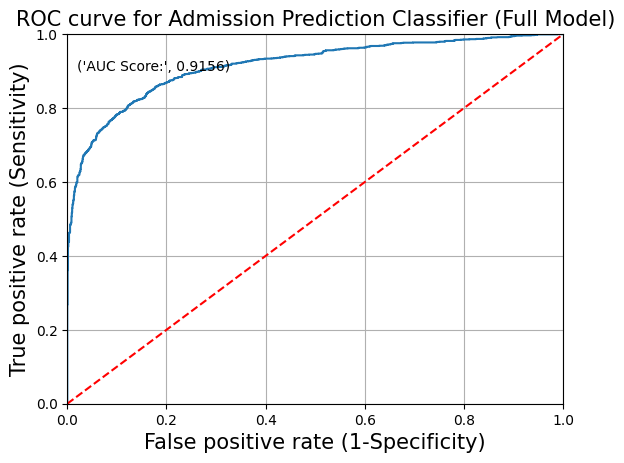

In [41]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Admission Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(Y_test, Y_pred_prob),4)))
                               
# plot the grid
plt.grid(True)

In [42]:
## To find the Optimum Threshold

# create a dataframe to store the values for false positive rate, true positive rate and threshold
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

# sort the dataframe based on the values of difference 
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.808060,0.123249,0.557491,0.684811
1,0.818306,0.133754,0.535579,0.684553
2,0.811475,0.127451,0.551629,0.684024
3,0.816940,0.133053,0.535930,0.683887
4,0.781421,0.098039,0.611869,0.683382


** The Optimum threshold is 5.5 **

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>For the full model, calculate the accuracy manually using the confusion matrix. Consider 0.5 as the probability threshold.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Plotting the confusion matrix

In [43]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(Y_test, Y_pred)

conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index = ['Actual:0', 'Actual:1'])


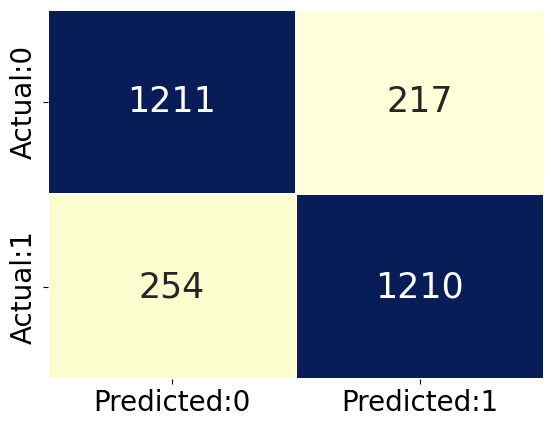

In [44]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap= "YlGnBu", cbar=False, linewidths=0.1, annot_kws={'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [45]:
TN = cm[1,1]
TP = cm[0,0]
FP = cm[1,0]
FN = cm[0,1]

In [46]:
print("True Negative", TN)
print("True Positive", TP)
print("False Positive", FP)
print("False Negative", FN)

True Negative 1210
True Positive 1211
False Positive 254
False Negative 217


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Calculate value of kappa for the full model . Consider threshold value as 0.18</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Kappa score:** It is a measure of inter-rater reliability. For logistic regression, the actual and predicted values of the target variable are the raters.

In [47]:
# compute the kappa value
kappa = cohen_kappa_score(Y_test, Y_pred)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.674327127499333


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Calculate the cross entropy for the logistic regression model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Predict whether a client subscribed a term deposit or not. For the logistic regression model find the following:<br> <ol type = "a">
                        <li> Precision </li>
                        <li> Recall</li>   
                        <li> F<sub>1</sub> score </li>
                        </ol>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Precision:** It is defined as the ratio of true positives to the total positive predictions.

In [48]:
# calculate the precision value
precision = TP / (TP+FP)

# print the value
precision

0.8266211604095564

**Recall:** It is the ratio of true positives to the total actual positive observations. It is also known as, `Sensitivity` or `True Positive Rate`.

In [49]:
# calculate the recall value
recall = TP / (TP+FN)

# print the value
recall

0.8480392156862745

**Specificity:** It is the ratio of true negatives to the total actual negative observations.

In [50]:
# calculate the specificity value
specificity = TN / (TN+FP)

# print the value
specificity

0.8265027322404371

**f1-score:** It is defined as the harmonic mean of precision and recall.

In [51]:
# calculate the f1_score
f1_score = 2*((precision*recall)/(precision+recall))

# print the f1_score
f1_score

0.8371932250259247

**Accuracy:** It is the ratio of correct predictions (i.e. TN+TP) to the total observations. According to the confusion matrix, it is the ratio of the sum of diagonal elements to the sum of all the in the matrix. It is not a very good measure if the dataset is imbalanced.

In [52]:
# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)

# print the accuracy
accuracy

0.8371369294605809

**Classification Report**

In [53]:
# calculate various performance measures
acc_table = classification_report(Y_test, Y_pred)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1428
           1       0.85      0.83      0.84      1464

    accuracy                           0.84      2892
   macro avg       0.84      0.84      0.84      2892
weighted avg       0.84      0.84      0.84      2892



## 3.Build a Decision Tree model and generate a classification report.



In [54]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_classification = DecisionTreeClassifier(criterion='gini', random_state= 10)

In [55]:
decision_tree = decision_tree_classification.fit(X_train, Y_train)

In [56]:
feat = pd.DataFrame({'feature':X_train.columns, 'feat_imp':decision_tree.feature_importances_})
feat.sort_values('feat_imp', ascending = False)

,feature,feat_imp
1,duration,0.397296
7,nr.employed,0.273070
6,euribor3m,0.124223
0,age,0.086714
5,cons.conf.idx,0.061922
2,campaign,0.034605
4,cons.price.idx,0.013082
3,emp.var.rate,0.009088


In [57]:
from sklearn import linear_model, datasets, tree
import pydotplus
from IPython.display import Image

# save the column names in 'labels'
labels = X_train.columns

# export a decision tree in DOT format
# pass the 'decision_tree' to export it to Graphviz
# pass the column names to 'feature_names'
# pass the required class labels to 'class_names'
dot_data = tree.export_graphviz(decision_tree, feature_names = labels, class_names = ["0","1"])  

# plot the decision tree using DOT format in 'dot_data'
graph = pydotplus.graph_from_dot_data(dot_data)  

# display the decision tree
Image(graph.create_png())


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.709611 to fit

(process:16700): GLib-GIO-WARNING **: 19:36:32.800: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.5.13.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs



In [58]:
# Let y_pred_prob be the predicted values of y 

desicion_pred_prob = decision_tree.predict(X_test)
desicion_pred_prob

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [59]:
# Convert probabilities to 0 & 1 using 'if_else'


desicion_pred = [0 if val < 0.5 else 1 for val in desicion_pred_prob]

In [60]:
print(desicion_pred)

[1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Determining optimal hyperparameters using GridSearchCV</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [61]:
from sklearn.model_selection import GridSearchCV

parameters = [{'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150], 
                'max_leaf_nodes': [2,4,6,10,15,30,40,50,100], 'min_samples_split': [2, 3, 4]}]
grid_search = GridSearchCV(estimator = decision_tree_classification,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

grid_search.fit(X_train, Y_train)
best_accuracy_dtc = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accurary", best_accuracy_dtc)
print("Best Paramerter",best_parameters)

Best Accurary 0.8891524343334432
Best Paramerter {'criterion': 'entropy', 'max_depth': 11, 'max_leaf_nodes': 40, 'min_samples_split': 2}


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare the Full model and optimized model using model performance metrics
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [62]:
# calculate various performance measures
acc_table = classification_report(Y_test, desicion_pred)

# print the table
print("Accuracy of the model without Grid serachCV",acc_table)

Accuracy of the model without Grid serachCV               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1428
           1       0.82      0.84      0.83      1464

    accuracy                           0.82      2892
   macro avg       0.82      0.82      0.82      2892
weighted avg       0.82      0.82      0.82      2892



## 4.Build a Random Forest model with n_estimators=30 and generate a classification report.



In [63]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators=100)
rand_forest.fit(X_train, Y_train)

RandomForestClassifier()

In [64]:


# Let rand_pred_prob be the predicted values of y 

rand_pred_prob = rand_forest.predict(X_test)
rand_pred_prob

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [65]:
# Convert probabilities to 0 & 1 using 'if_else'

rand_pred = [0 if val < 0.5 else 1 for val in rand_pred_prob]
print(rand_pred)

[1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Determining optimal hyperparameters using GridSearchCV</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [69]:
from sklearn.model_selection import GridSearchCV

parameters = [{'criterion':['gini','entropy'],'max_depth':[5,6,7,8,9], 
                'max_leaf_nodes': [2,4,6,10], 'min_samples_split': [2, 3]}]
grid_search = GridSearchCV(estimator = rand_forest,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, Y_train)
best_accuracy_dtc = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accurary", best_accuracy_dtc)
print("Best Paramerter",best_parameters)

Best Accurary 0.8764057588746017
Best Paramerter {'criterion': 'gini', 'max_depth': 7, 'max_leaf_nodes': 10, 'min_samples_split': 2}


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare the Full model and optimized model using model performance metrics
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [74]:
# calculate various performance measures
acc_table = classification_report(Y_test, rand_pred)

# print the table
print("Accuracy of the model without Grid serachCV",acc_table)

Accuracy of the model without Grid serachCV               precision    recall  f1-score   support

           0       0.85      0.92      0.88      1428
           1       0.91      0.84      0.87      1464

    accuracy                           0.88      2892
   macro avg       0.88      0.88      0.88      2892
weighted avg       0.88      0.88      0.88      2892



## 5.Build the XGBoost model with a learning rate of 0.4 and gamma equal to 3. Calculate the accuracy by plotting the confusion matrix

In [111]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(gamma=3,
                         learning_rate=0.4)
# Train Adaboost Classifer
xgb_classifier.fit(X_train, Y_train)

#Predict the response for test dataset
# Let rand_pred_prob be the predicted values of y 

xg_s = xgb_pred_prob = xgb_classifier.predict(X_test)

# Convert probabilities to 0 & 1 using 'if_else'

xgb_pred = [0 if val < 0.5 else 1 for val in xgb_pred_prob]
print(xgb_pred)

[1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Determining optimal hyperparameters using GridSearchCV</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [72]:
from sklearn.model_selection import GridSearchCV

parameters = [{'criterion':['gini','entropy'],'max_depth':[5,6,7,8,9], 
                'max_leaf_nodes': [2,4,6,10], 'min_samples_split': [2, 3]}]
grid_search = GridSearchCV(estimator = xgb_classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, Y_train)
best_accuracy_dtc = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accurary", best_accuracy_dtc)
print("Best Paramerter",best_parameters)

[19:48:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "max_leaf_nodes", "min_samples_split" } are not used.

Best Accurary 0.8938944939004287
Best Paramerter {'criterion': 'gini', 'max_depth': 7, 'max_leaf_nodes': 2, 'min_samples_split': 2}


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare the Full model and optimized model using model performance metrics
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [75]:
# calculate various performance measures
acc_table = classification_report(Y_test, xgb_pred)

# print the table
print("Accuracy of the model without Grid serachCV",acc_table)

Accuracy of the model without Grid serachCV               precision    recall  f1-score   support

           0       0.85      0.92      0.89      1428
           1       0.92      0.85      0.88      1464

    accuracy                           0.88      2892
   macro avg       0.89      0.88      0.88      2892
weighted avg       0.89      0.88      0.88      2892



## 6.Build the K - Nearest Neighbor Model

In [76]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [78]:
# Let knn_pred_prob be the predicted values of y 

knn_pred_prob = knn_classifier.predict(X_test)
print(knn_pred_prob)


# Convert probabilities to 0 & 1 using 'if_else'

knn_pred = [0 if val < 0.5 else 1 for val in knn_pred_prob]
print(knn_pred)

[1 1 1 ... 0 0 1]
[1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Determining optimal K-Value using Elbow Curve Method</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare the Full model and optimized model using model performance metrics
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [79]:
# calculate various performance measures
acc_table = classification_report(Y_test, knn_pred)

# print the table
print("Accuracy of the model without Grid serachCV",acc_table)

Accuracy of the model without Grid serachCV               precision    recall  f1-score   support

           0       0.82      0.85      0.83      1428
           1       0.85      0.81      0.83      1464

    accuracy                           0.83      2892
   macro avg       0.83      0.83      0.83      2892
weighted avg       0.83      0.83      0.83      2892



## 7. Build the Naive Bayes Model

In [80]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, Y_train)

GaussianNB()

In [81]:
# Let knn_pred_prob be the predicted values of y 

naive_bayes_pred_prob = naive_bayes.predict(X_test)
print(naive_bayes_pred_prob)


# Convert probabilities to 0 & 1 using 'if_else'

naive_bayes_pred = [0 if val < 0.5 else 1 for val in naive_bayes_pred_prob]
print(naive_bayes_pred)

[1 0 1 ... 0 0 1]
[1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare the classification results of Gaussian, Bernoulli and Multinomial Naive Bayes</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [83]:
# calculate various performance measures
acc_table = classification_report(Y_test, naive_bayes_pred)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.74      0.87      0.80      1428
           1       0.84      0.70      0.77      1464

    accuracy                           0.78      2892
   macro avg       0.79      0.79      0.78      2892
weighted avg       0.79      0.78      0.78      2892



In [84]:
# importing classifier
from sklearn.naive_bayes import BernoulliNB

# initializaing the NB
classifer = BernoulliNB()

# training the model
classifer.fit(X_train, Y_train)

# testing the model
BNB_y_pred = classifer.predict(X_test)

# calculate various performance measures
acc_table = classification_report(Y_test, BNB_y_pred)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.67      0.77      0.71      1428
           1       0.73      0.62      0.68      1464

    accuracy                           0.70      2892
   macro avg       0.70      0.70      0.69      2892
weighted avg       0.70      0.70      0.69      2892



## 8. Compare the results of all above mentioned algorithms 

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare all the classification models using model performance evaluation metrics
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [92]:
classification_all_model_accurary = pd.DataFrame()


classification_all_model_accurary['Logistic regression'] = [accuracy_score(Y_test, Y_pred)]
classification_all_model_accurary['Decision tree Classification'] = [accuracy_score(Y_test, desicion_pred)]
classification_all_model_accurary['Random forest Classification'] = [accuracy_score(Y_test, rand_pred)]
classification_all_model_accurary['XGBoost Classification'] = [accuracy_score(Y_test, xgb_pred)]
classification_all_model_accurary['KNN Classification'] = [accuracy_score(Y_test, knn_pred)]
classification_all_model_accurary['Naive Bayes Classification'] = [accuracy_score(Y_test, naive_bayes_pred)]
classification_all_model_accurary.index = ['Accuracy Score']
classification_all_model_accurary


,Logistic regression,Decision tree Classification,Random forest Classification,XGBoost Classification,KNN Classification,Naive Bayes Classification
Accuracy Score,0.837137,0.823651,0.877248,0.884509,0.830221,0.784232


**From the 6 models we have used to train the models, I would say XGBoost give the high accuracy among the other models with the accuracy rate 88%**

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare all the classification models using their ROC curves.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [106]:
from sklearn.metrics import roc_curve, auc


# Compute ROC curve and area the curve for logistic
fpr1, tpr1, thresholds1 = roc_curve(Y_test, Y_pred)
roc_auc1 = auc(fpr1, tpr1)
print("Logistic regression : Area under the ROC curve : %f" % roc_auc1)


# Compute ROC curve and area the curve for Descision
fpr2, tpr2, thresholds2 = roc_curve(Y_test, desicion_pred)
roc_auc2 = auc(fpr2, tpr2)
print("Decision Tree : Area under the ROC curve : %f" % roc_auc2)


# Compute ROC curve and area the curve for random foresy
fpr3, tpr3, thresholds3 = roc_curve(Y_test, rand_pred)
roc_auc3 = auc(fpr3, tpr3)
print("Random Forest : Area under the ROC curve : %f" % roc_auc3)


# Compute ROC curve and area the curve for XGboost
fpr4, tpr4, thresholds4 = roc_curve(Y_test, xgb_pred)
roc_auc4 = auc(fpr4, tpr4)
print("XGBoost : Area under the ROC curve : %f" % roc_auc4)


# Compute ROC curve and area the curve for KNN
fpr5, tpr5, thresholds5 = roc_curve(Y_test, knn_pred)
roc_auc5 = auc(fpr5, tpr5)
print("KNN : Area under the ROC curve : %f" % roc_auc5)


# Compute ROC curve and area the curve for Naive bayes
fpr6, tpr6, thresholds6= roc_curve(Y_test, naive_bayes_pred)
roc_auc6 = auc(fpr6, tpr6)
print("Naive Bayes : Area under the ROC curve : %f" % roc_auc6)


Logistic regression : Area under the ROC curve : 0.837271
Decision Tree : Area under the ROC curve : 0.823495
Random Forest : Area under the ROC curve : 0.877715
XGBoost : Area under the ROC curve : 0.884999
KNN : Area under the ROC curve : 0.830432
Naive Bayes : Area under the ROC curve : 0.785258


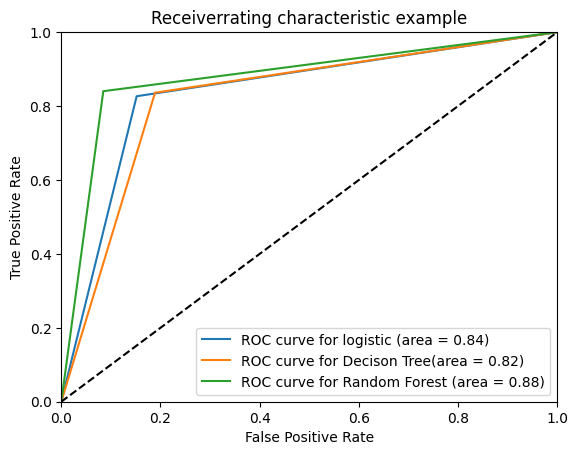

In [107]:
import pylab as pl


# Plot ROC curve
plt.clf()
plt.plot(fpr1, tpr1, label='ROC curve for logistic (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='ROC curve for Decison Tree(area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='ROC curve for Random Forest (area = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiverrating characteristic example')
plt.legend(loc="lower right")
plt.show()

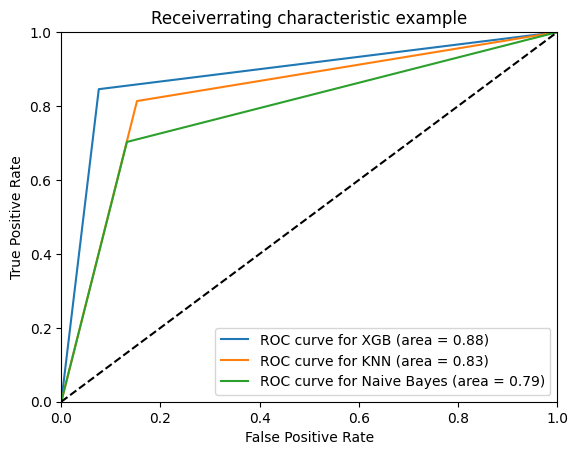

In [108]:
pl.clf()
pl.plot(fpr4, tpr4, label='ROC curve for XGB (area = %0.2f)' % roc_auc4)
pl.plot(fpr5, tpr5, label='ROC curve for KNN (area = %0.2f)' % roc_auc5)
pl.plot(fpr6, tpr6, label='ROC curve for Naive Bayes (area = %0.2f)' % roc_auc6)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiverrating characteristic example')
pl.legend(loc="lower right")
pl.show()

## 9. Intrepret your solution based on the results



## Based on our models performance I would say that XGBoost model will perform more efficiently than the other model where our accuracy factor and ROC curve both implies the same!

In [109]:
print(logreg.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 6748
Model:                          Logit   Df Residuals:                     6740
Method:                           MLE   Df Model:                            7
Date:                Fri, 30 Dec 2022   Pseudo R-squ.:                  0.4958
Time:                        20:29:20   Log-Likelihood:                -2354.3
converged:                       True   LL-Null:                       -4669.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
age               -0.0038      0.003     -1.246      0.213      -0.010       0.002
duration          -0.0073      0.000    -37.375      0.000      -0.008      -0.007
campaign           0.0768      0.028

### By checkingthe each and every summary of every model, we can come to know how many observation the model had made and R squared values. Also for the each and evry variable we can see the co-efficient and standard error 

## Where XGBoost stands out of the table when compared to other models and that is why the XGBoost model would perform much better that other 

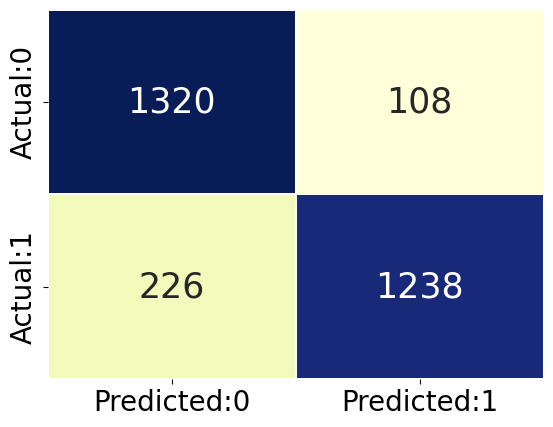

In [117]:
#Plotting the comfusion matrix for the reference

from sklearn.metrics import confusion_matrix


cm = confusion_matrix(Y_test, xgb_pred)

conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index = ['Actual:0', 'Actual:1'])

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap= "YlGnBu", cbar=False, linewidths=0.1, annot_kws={'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()


In [118]:
TN = cm[1,1]
TP = cm[0,0]
FP = cm[1,0]
FN = cm[0,1]

print("True Negative", TN)
print("True Positive", TP)
print("False Positive", FP)
print("False Negative", FN)

True Negative 1238
True Positive 1320
False Positive 226
False Negative 108


#### I have plotted the confusion matrix to make an understanding on XGBoost success rate 

### From the above outtup we can see the True positive is 1320 which is highly appriciatable and the true negative which mean the result is no and predicted no is 1238.  Miss calculations are 226 False positive and 108 False negative which is very minimal from 2000 record 

In [119]:
# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)

# print the accuracy
accuracy

0.8845089903181189

### That again I conclude the XGBoost model as best performing model than others